<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import math

In [6]:
help(np.linspace)

Help on _ArrayFunctionDispatcher in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0, *, device=None)
    Return evenly spaced numbers over a specified interval.

    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].

    The endpoint of the interval can optionally be excluded.

    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.

    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``

    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so th

# 1 Some nomenclature

# 2 Comparing the two ‘dialects’

### pyplot Interface

In [5]:
help(ax)

Help on Axes in module matplotlib.axes._axes object:

class Axes(matplotlib.axes._base._AxesBase)
 |  Axes(fig, *args, facecolor=None, frameon=True, sharex=None, sharey=None, label='', xscale=None, yscale=None, box_aspect=None, forward_navigation_events='auto', **kwargs)
 |
 |  An Axes object encapsulates all the elements of an individual (sub-)plot in
 |  a figure.
 |
 |  It contains most of the (sub-)plot elements: `~.axis.Axis`,
 |  `~.axis.Tick`, `~.lines.Line2D`, `~.text.Text`, `~.patches.Polygon`, etc.,
 |  and sets the coordinate system.
 |
 |  Like all visible elements in a figure, Axes is an `.Artist` subclass.
 |
 |  The `Axes` instance supports callbacks through a callbacks attribute which
 |  is a `~.cbook.CallbackRegistry` instance.  The events you can connect to
 |  are 'xlim_changed' and 'ylim_changed' and the callback will be called with
 |  func(*ax*) where *ax* is the `Axes` instance.
 |
 |  .. note::
 |
 |      As a user, you do not instantiate Axes directly, but use

In [7]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs) -> 'Legend'
    Place a legend on the Axes.

    Call signatures::

        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)

    The call signatures correspond to the following different ways to use
    this method:

    **1. Automatic detection of elements to be shown in the legend**

    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.

    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::

        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()

    or::

        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()

    .. note::
        Specific artists can be excluded from the automatic legend element
        selectio

In [3]:
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

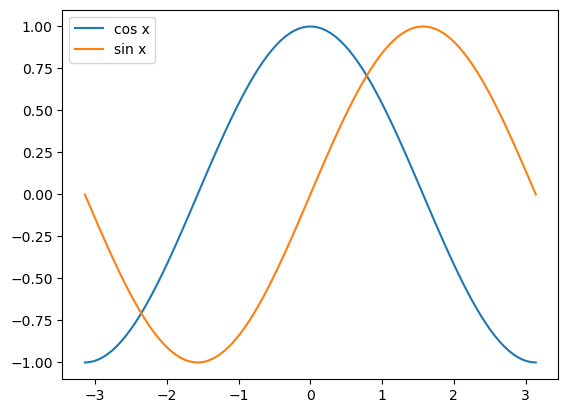

In [8]:
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()

### OO Interface

In [10]:
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs) -> 'Axes'
    Add an Axes to the current figure or retrieve an existing Axes.

    This is a wrapper of `.Figure.add_subplot` which provides additional
    behavior when working with the implicit API (see the notes section).

    Call signatures::

       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(**kwargs)
       subplot(ax)

    Parameters
    ----------
    *args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
        The position of the subplot described by one of

        - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
          *index* position on a grid with *nrows* rows and *ncols* columns.
          *index* starts at 1 in the upper left corner and increases to the
          right. *index* can also be a two-tuple specifying the (*first*,
          *last*) indices (1-based, and including *last*) of the subplot, e.g.,
 

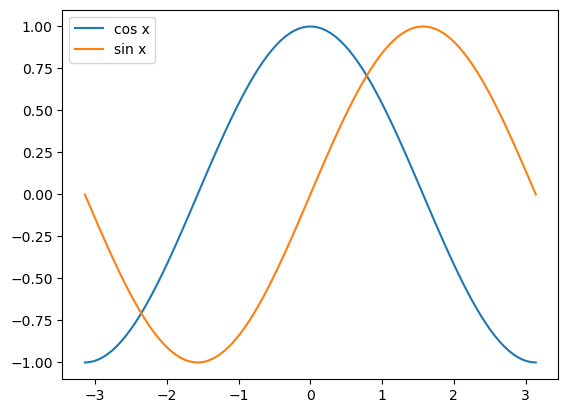

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()

# 3 What is OO ax, really?

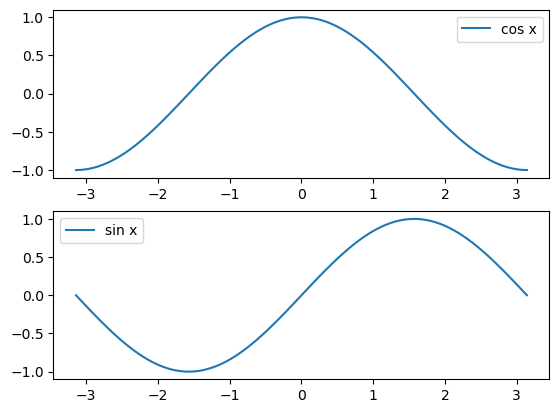

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

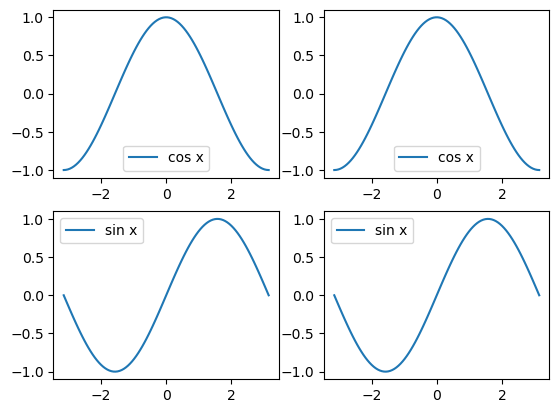

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=2)

ax[0][0].plot(x, cos_x, label='cos x')
ax[1][0].plot(x, sin_x, label='sin x')
ax[0][1].plot(x, cos_x, label='cos x')
ax[1][1].plot(x, sin_x, label='sin x')

ax[0][0].legend()
ax[1][0].legend()
ax[0][1].legend()
ax[1][1].legend()

In [23]:
type(ax)

numpy.ndarray

**ax** is a 2D numpy **array**, where **nrows** and **ncols** refers to the size in each dimension.\
Hence, when we want to plot each element in the array **ax**, we have to specify 2 indexes.

# 4 A complete OO example

Help on method fill_between in module matplotlib.axes._axes:

fill_between(x, y1, y2=0, where=None, interpolate=False, step=None, *, data=None, **kwargs) method of matplotlib.axes._axes.Axes instance
    Fill the area between two horizontal curves.

    The curves are defined by the points (*x*, *y1*) and (*x*,
    *y2*).  This creates one or multiple polygons describing the filled
    area.

    You may exclude some horizontal sections from filling using *where*.

    By default, the edges connect the given points directly.  Use *step*
    if the filling should be a step function, i.e. constant in between
    *x*.

    Parameters
    ----------
    x : array (length N)
        The x coordinates of the nodes defining the curves.

    y1 : array (length N) or scalar
        The y coordinates of the nodes defining the first curve.

    y2 : array (length N) or scalar, default: 0
        The y coordinates of the nodes defining the second curve.

    where : array of bool (length N), optio

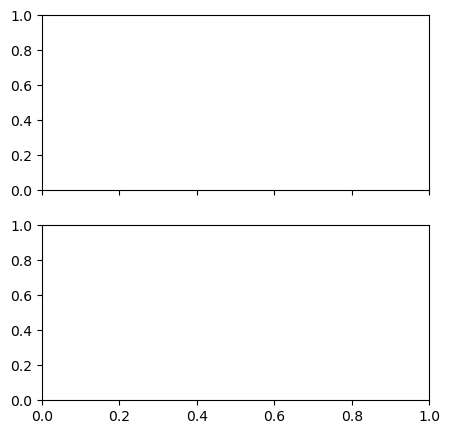

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5),
                       sharex=True)
help(ax[0].fill_between)

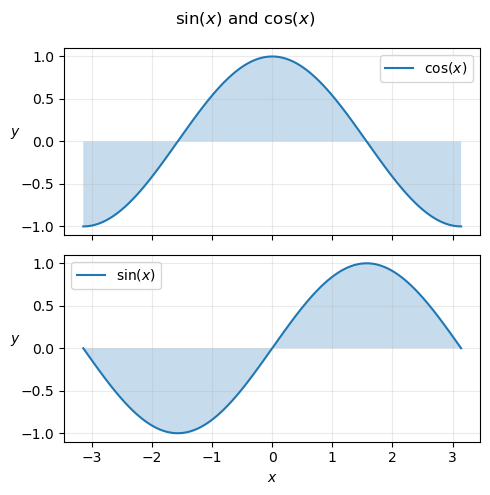

In [40]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5),
                       sharex=True)
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
fig.tight_layout()

# 5 Multiple rows and columns

In [42]:
help(ax.flatten)

Help on built-in function flatten:

flatten(...) method of numpy.ndarray instance
    a.flatten(order='C')

    Return a copy of the array collapsed into one dimension.

    Parameters
    ----------
    order : {'C', 'F', 'A', 'K'}, optional
        'C' means to flatten in row-major (C-style) order.
        'F' means to flatten in column-major (Fortran-
        style) order. 'A' means to flatten in column-major
        order if `a` is Fortran *contiguous* in memory,
        row-major order otherwise. 'K' means to flatten
        `a` in the order the elements occur in memory.
        The default is 'C'.

    Returns
    -------
    y : ndarray
        A copy of the input array, flattened to one dimension.

    See Also
    --------
    ravel : Return a flattened array.
    flat : A 1-D flat iterator over the array.

    Examples
    --------
    >>> a = np.array([[1,2], [3,4]])
    >>> a.flatten()
    array([1, 2, 3, 4])
    >>> a.flatten('F')
    array([1, 3, 2, 4])



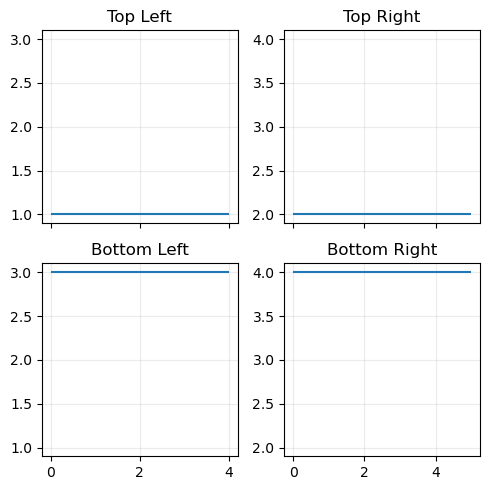

In [67]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
# This is a way to access elements in an array without indexing (Unpacking)
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

In [52]:
help(top_left.hlines)

Help on method hlines in module matplotlib.axes._axes:

hlines(y, xmin, xmax, colors=None, linestyles='solid', label='', *, data=None, **kwargs) method of matplotlib.axes._axes.Axes instance
    Plot horizontal lines at each *y* from *xmin* to *xmax*.

    Parameters
    ----------
    y : float or array-like
        y-indexes where to plot the lines.

    xmin, xmax : float or array-like
        Respective beginning and end of each line. If scalars are
        provided, all lines will have the same length.

    colors : :mpltype:`color` or list of color , default: :rc:`lines.color`

    linestyles : {'solid', 'dashed', 'dashdot', 'dotted'}, default: 'solid'

    label : str, default: ''

    Returns
    -------
    `~matplotlib.collections.LineCollection`

    Other Parameters
    ----------------
    data : indexable object, optional
        If given, the following parameters also accept a string ``s``, which is
        interpreted as ``data[s]`` (unless this raises an exception):

 

### Using ax

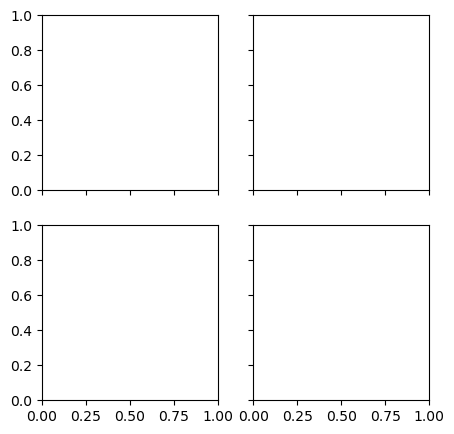

In [68]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='row')

In [69]:
ax.shape

(2, 2)

In [70]:
ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

Text(0.5, 1.0, 'Bottom Right')

In [71]:
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

In [72]:
top_left, top_right, bottom_left, bottom_right = ax.flatten()

In [73]:
top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

## 5.1 Sharing axes

- For the parameters **sharex** and **sharey**
  - **True** makes all the axes use the same range
  - **col** makes the columns use the same range
  - **row** makes the rows use the same range

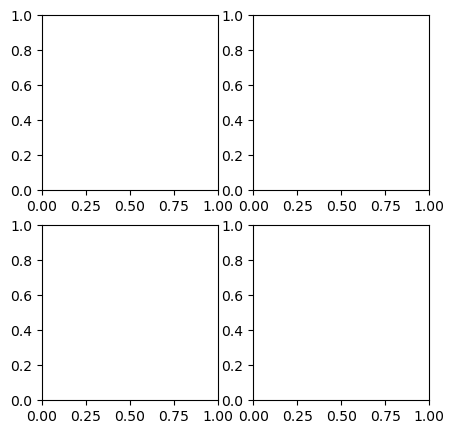

In [74]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5)
)

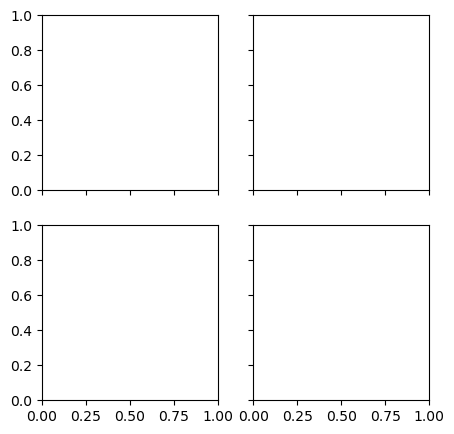

In [76]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey='row'
)
# The columns use the same x range
# The rows use the same x range
# The rows use the same y range

## 5.2 Accessing all axes

In [77]:
top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

In [79]:
for a in ax.flatten():
    a.grid(alpha=.25)

# We can use a for loop to more easily make changes to all axes
# This works because we have used flatten() to unpack
# If we did not unpack, the we need to use nested for loops for the 2 dimensions

# 6 Other useful plots

## 6.1 Histograms

### Data

In [ ]:

# Your code here


### A quick helper function

In [80]:
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data

### The histogram

In [82]:
help(plt.style.use)

Help on function use in module matplotlib.style.core:

use(style)
    Use Matplotlib style settings from a style specification.

    The style name of 'default' is reserved for reverting back to
    the default style settings.

    .. note::

       This updates the `.rcParams` with the settings from the style.
       `.rcParams` not defined in the style are kept.

    Parameters
    ----------
    style : str, dict, Path or list

        A style specification. Valid options are:

        str
            - One of the style names in `.style.available` (a builtin style or
              a style installed in the user library path).

            - A dotted name of the form "package.style_name"; in that case,
              "package" should be an importable Python package name, e.g. at
              ``/path/to/package/__init__.py``; the loaded style file is
              ``/path/to/package/style_name.mplstyle``.  (Style files in
              subpackages are likewise supported.)

            

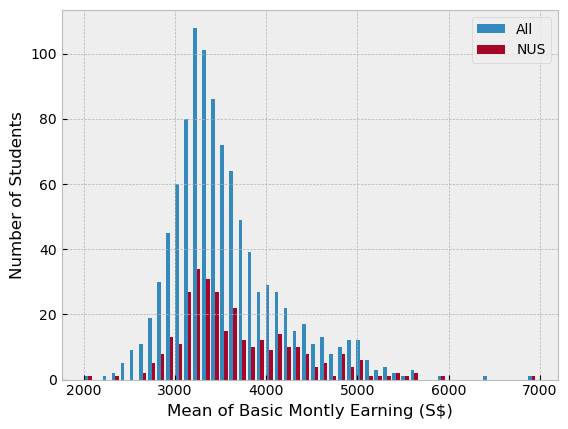

In [81]:
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

## 6.2 Scatter plots

## 6.3 Bar charts

## 6.4 Pie charts